### 1. 데이터 그룹 연산
- group by

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [ ]:
'''
통계자료에서 그룹 함수 가장 많이 사용한다.
그룹핑 시키는 방법
합, 평균, 최대, 최소...총합 기능이 다 제공된다.
사용자 정의 함수 만들고 가져다 쓰는 방법도 소개
'''

In [2]:
df = DataFrame({
    'Gender':['Female','Male','Female','Male','Female','Male','Female','Female'],
    'Smoking':['Smoker','Smoker','Smoker','Non-Smoker','Non-Smoker','Non-Smoker','Non-Smoker','Smoker'],
    'CountA':np.random.randint(1,10,8),
    'CountB':np.random.randint(1,10,8)
})

df

,Gender,Smoking,CountA,CountB
0,Female,Smoker,9,8
1,Male,Smoker,5,2
2,Female,Smoker,6,3
3,Male,Non-Smoker,2,2
4,Female,Non-Smoker,6,6
5,Male,Non-Smoker,8,6
6,Female,Non-Smoker,4,7
7,Female,Smoker,1,2


In [4]:
# 1.
# pandas.core.groupby.generic.DataFrameGroupBy : object의 정확한 이름. 
# Full Name(모든 패키지 명을 포함한 이름, FQCN = Full Qualified Class Name)
# groupby()로 데이터를 세분화(그룹핑)하면 DataFrameGroupBy 객체가 리턴
# 이 객체만으로는 아무것도 못한다.
# 1. 객체를 리턴받고 
# 2. 통계함수를 적용
df.groupby('Gender')

In [6]:
# 2. Smoking은 Numeric 컬럼이 아니라서 sum() 통계함수의 적용을 받지 못한다.
df.groupby('Gender').sum()

,CountA,CountB
Gender,,
Female,26,26
Male,15,10


In [9]:
# 3. 
# 통계 함수에 따라 적용되는 값이 다르다. 
# 숫자 : sum(), meqn()
# 숫자, 문자, 날짜 : max(), min(), count()
df.groupby('Gender').max()

,Smoking,CountA,CountB
Gender,,,
Female,Smoker,9,8
Male,Smoker,8,6


In [13]:
# 그룹화하려는 컬럼이 많을 수록 세분화가 자세히 진행됨
df.groupby(['Gender','Smoking']).sum()

CountA  CountB
Gender Smoking                   
Female Non-Smoker      10      13
       Smoker          16      13
Male   Non-Smoker      10       8
       Smoker           5       2

In [15]:
# df.groupby('Gender')['CountA']
# 특정한 컬럼에 한해서만 그룹핑...시리즈 반환
df.groupby('Gender')['CountA'].sum()
df.groupby('Gender')['CountA'].agg('sum') # 위와 동일한 결과. aggregation -> 조금더 많이 사용

Gender
Female    26
Male      15
Name: CountA, dtype: int32

In [21]:
# DataFrame으로 반환 [] 추가로 
df.groupby('Gender')[['CountA']].sum()
df.groupby('Gender')[['CountA']].agg('sum')
# df.groupby('Gender')['CountA'].agg(['sum']) # 이것의 경우 ['sum']이 컬럼명으로 인식되서 컬럼명이 sum으로 나옴

,CountA
Gender,
Female,26
Male,15


### aggregation

In [23]:
# ['sum','mean','count'] : []에 의해 컬럼명으로 나옴
df.groupby('Gender')['CountA'].agg(['sum','mean','count'])

,sum,mean,count
Gender,,,
Female,26,5.2,5
Male,15,5.0,3


### 실전 데이터로 응용하기

In [24]:
tipdf = pd.read_csv('../data/tips.csv')
tipdf.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0


In [53]:
# 1. 날짜별로 그룹핑...count()
tipdf.groupby(['day']).count()
# 결과 값이 별 의미가 없음. 즉, 어떤 컬럼으로 그룹화할지 + 어떤 통계함수를 사용할지 중요!!

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76
Thur,62,62,62,62,62,62


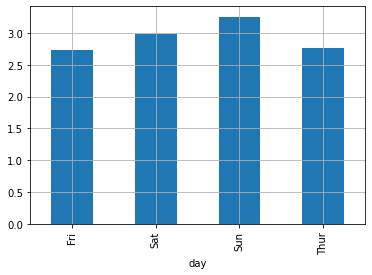

In [54]:
# 문제 1.
'''
day라는 컬럼으로 세분화...요일별 팁의 평균을 확인...정렬로 마무리...시각화
'''
# 1. tip_group = tipdf.groupby('day')[['tip']].mean()
tip_group = tipdf.groupby(['day'])
tip_group['tip'].mean()

# 2.
tip_group['tip'].mean().sort_values(ascending=False)

# 3.
tip_group['tip'].mean().plot(kind='bar', grid=True)
plt.show()

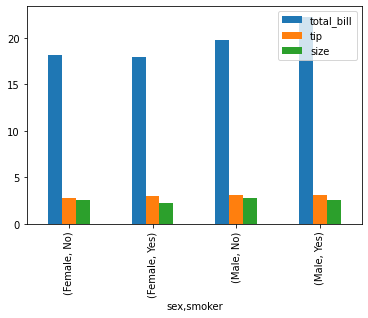

In [47]:
# 문제 2.
# tipdf에서 성별로 먼저 그룹핑하고 다시 릅연여부로 그룹핑...mean()

# tipdf.groupby(['sex','smoker']).mean()
tip_group2 = tipdf.groupby(by=['sex','smoker'])
tip_group2.mean().plot(kind='bar')
plt.show()

### 알아두면 좋은 함수, 속성들

#### 1. unique() : 중복된 것을 거를 때

In [57]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

#### 2. describe() 
- 데이터에 대한 간단한 설명(간략한 통계자료)...데이터의 성격을 알고 싶을 때

In [58]:
# 4분위 부분에서 유명한 그래프 - Box Plot
df.describe()

,CountA,CountB
count,8.000000,8.000000
mean,5.125000,4.500000
std,2.748376,2.507133
min,1.000000,2.000000
25%,3.500000,2.000000
50%,5.500000,4.500000
75%,6.500000,6.250000
max,9.000000,8.000000


#### 3. sum() 
- 숫자 데이터에만 적용

In [61]:
df.sum()

Gender            FemaleMaleFemaleMaleFemaleMaleFemaleFemale
Smoking    SmokerSmokerSmokerNon-SmokerNon-SmokerNon-Smok...
CountA                                                    41
CountB                                                    36
dtype: object

#### 4. count() 
- 값의 갯수

In [62]:
df.count()

Gender     8
Smoking    8
CountA     8
CountB     8
dtype: int64

#### 5. value_counts() 
- 해당 컬럼에서 그 값이 몇개 나왔는지를 알 수 있다.

In [ ]:
df['Smoking'].value_counts()

#### 6. apply() 

In [64]:
'''
Pandas에서 내가 함수를 만들어서 적용할 때 사용
Pandas에서 제공하지 않는 함수를 내가 직접 만들어서 사용할 수 있다.
'''

def add(x):
    return x + 100

# df[['CountA']].apply(add) # sum() | agg(['sum','mean']) : 여러 개의 통계 함수 적용 가능

# agg 는 커스텀 함수도 적용가능. 단, ''와 같이 string으로 적용하면 안됨
df[['CountA']].agg(add) 

,CountA
0,109
1,105
2,106
3,102
4,106
5,108
6,104
7,101
